In [1]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt
from utils.utils import PROJECT_DATA_DIR
import pandas as pd
import os
import warnings


plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
data = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'closing_prices.csv'))
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Looking at your data

In [3]:
data.head()

,AAPL,ABBV,ABT,AMGN,AMZN,AVGO,BA,BAC,BMY,C,...,PFE,PG,PM,T,UNH,V,VZ,WFC,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,27.294495,NaN,21.129273,49.792737,133.90,16.673423,45.640616,14.639460,19.648366,32.843185,...,13.934719,47.114847,34.709530,18.323770,27.878733,20.694802,20.828887,22.385830,43.935552,53.998112
2010-01-05,27.341684,NaN,20.958563,49.365427,134.69,16.797192,47.135432,15.115313,19.341720,34.098954,...,13.735967,47.130264,34.407096,18.234010,27.834524,20.457660,20.566022,23.000375,43.498060,54.208950
2010-01-06,26.906778,NaN,21.074956,48.994453,132.25,16.929801,48.565255,15.292591,19.334054,35.161528,...,13.691800,46.906716,34.407096,17.971143,28.108625,20.182950,20.274994,23.033151,43.400840,54.677481
2010-01-07,26.857038,NaN,21.249546,48.545833,130.00,16.823714,50.531263,15.796435,19.349386,35.258126,...,13.640272,46.652332,34.836130,17.769366,29.187345,20.370786,20.154309,23.868932,43.425145,54.505686
2010-01-08,27.035592,NaN,21.358180,48.977198,133.52,16.947483,50.043823,15.656478,19.027407,34.678540,...,13.750689,46.590664,34.646230,17.639188,28.913244,20.427137,20.167013,23.647696,43.206399,54.287039


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2055 entries, 2010-01-04 to 2018-03-02
Data columns (total 49 columns):
AAPL     2055 non-null float64
ABBV     1301 non-null float64
ABT      2055 non-null float64
AMGN     2055 non-null float64
AMZN     2055 non-null float64
AVGO     2055 non-null float64
BA       2055 non-null float64
BAC      2055 non-null float64
BMY      2055 non-null float64
C        2055 non-null float64
CELG     2055 non-null float64
CMCSA    2055 non-null float64
CSCO     2055 non-null float64
CVX      2055 non-null float64
DIS      2055 non-null float64
DWDP     129 non-null float64
FB       1456 non-null float64
GE       2055 non-null float64
GILD     2055 non-null float64
GOOG     991 non-null float64
GOOGL    2055 non-null float64
HD       2055 non-null float64
HON      2055 non-null float64
IBM      2055 non-null float64
INTC     2055 non-null float64
JNJ      2055 non-null float64
JPM      2055 non-null float64
KO       2055 non-null float64
MA       

In [5]:
no_st = data.shape[1]
data.T.head(no_st)

date,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,2010-01-14 00:00:00,2010-01-15 00:00:00,...,2018-02-16 00:00:00,2018-02-20 00:00:00,2018-02-21 00:00:00,2018-02-22 00:00:00,2018-02-23 00:00:00,2018-02-26 00:00:00,2018-02-27 00:00:00,2018-02-28 00:00:00,2018-03-01 00:00:00,2018-03-02 00:00:00
AAPL,27.294495,27.341684,26.906778,26.857038,27.035592,26.797095,26.492278,26.865966,26.710369,26.263985,...,172.430000,171.850000,171.070000,172.500000,175.500000,178.970000,178.390000,178.120000,175.000000,176.210000
ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,118.600000,117.980000,117.910000,117.560000,118.750000,121.540000,118.260000,115.830000,113.840000,115.040000
ABT,21.129273,20.958563,21.074956,21.249546,21.358180,21.466814,21.466814,21.606486,21.629933,21.684643,...,60.170000,59.120000,58.990000,58.990000,59.710000,60.530000,60.550000,60.330000,58.790000,59.460000
AMGN,49.792737,49.365427,48.994453,48.545833,48.977198,49.192881,48.338778,48.770143,48.450933,48.528579,...,183.550000,182.980000,182.430000,182.450000,186.670000,188.500000,185.790000,183.770000,183.290000,185.080000
AMZN,133.900000,134.690000,132.250000,130.000000,133.520000,130.308000,127.350000,129.110000,127.350000,127.140000,...,1448.690000,1468.350000,1482.920000,1485.340000,1500.000000,1521.950000,1511.980000,1512.450000,1493.450000,1500.250000
AVGO,16.673423,16.797192,16.929801,16.823714,16.947483,17.053570,16.797192,16.284436,16.293276,16.125304,...,247.131948,247.856791,246.863855,247.588698,251.917901,251.163269,250.031322,244.719112,241.591362,249.097962
BA,45.640616,47.135432,48.565255,50.531263,50.043823,49.450771,49.093315,49.686367,50.011327,49.410151,...,355.040000,353.350000,352.370000,355.920000,356.660000,363.480000,364.640000,362.210000,349.690000,344.670000
BAC,14.639460,15.115313,15.292591,15.796435,15.656478,15.796435,15.264600,15.507191,15.693800,15.171295,...,31.848595,31.808747,31.748975,31.569658,31.908367,32.296886,32.207228,31.978101,31.480000,31.630000
BMY,19.648366,19.341720,19.334054,19.349386,19.027407,19.226727,19.019741,19.157732,19.203729,19.219061,...,68.960000,67.350000,66.530000,65.940000,67.950000,68.630000,67.840000,66.200000,65.690000,66.170000
C,32.843185,34.098954,35.161528,35.258126,34.678540,35.064930,34.002357,33.809162,33.905759,33.036381,...,76.820000,76.460000,77.000000,76.270000,77.080000,77.650000,76.380000,75.490000,73.660000,73.680000


In [6]:
data[2050:].T # gives the last five rows but transposed so we can see all stocks

date,2018-02-26 00:00:00,2018-02-27 00:00:00,2018-02-28 00:00:00,2018-03-01 00:00:00,2018-03-02 00:00:00
AAPL,178.970000,178.390000,178.120000,175.000000,176.210000
ABBV,121.540000,118.260000,115.830000,113.840000,115.040000
ABT,60.530000,60.550000,60.330000,58.790000,59.460000
AMGN,188.500000,185.790000,183.770000,183.290000,185.080000
AMZN,1521.950000,1511.980000,1512.450000,1493.450000,1500.250000
AVGO,251.163269,250.031322,244.719112,241.591362,249.097962
BA,363.480000,364.640000,362.210000,349.690000,344.670000
BAC,32.296886,32.207228,31.978101,31.480000,31.630000
BMY,68.630000,67.840000,66.200000,65.690000,66.170000
C,77.650000,76.380000,75.490000,73.660000,73.680000


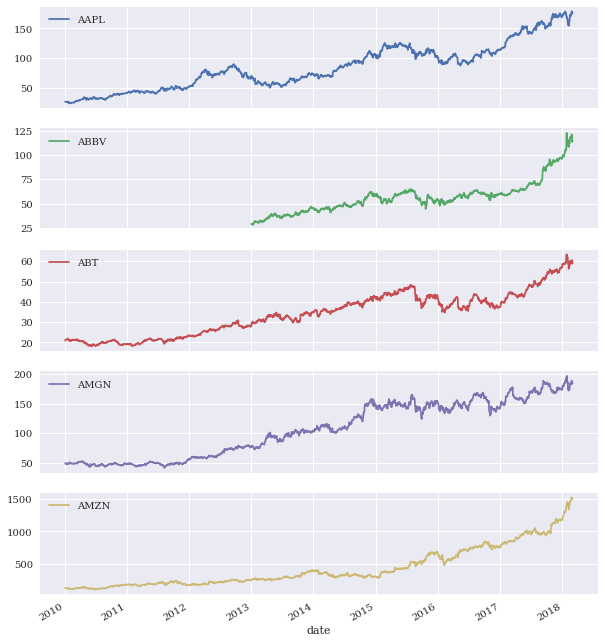

In [7]:
data[data.columns[:5]].plot(figsize=(10, 12), subplots=True);

## Summary Statistics

In [8]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
AAPL,2055.0,84.98,38.25,24.49,52.79,78.60,109.91,178.97
ABBV,1301.0,56.48,16.87,28.00,45.47,55.39,61.49,123.21
ABT,2055.0,34.04,10.55,18.07,23.23,34.90,41.71,63.42
AMGN,2055.0,106.66,46.26,41.64,58.17,104.85,149.21,196.55
AMZN,2055.0,436.14,305.36,108.61,210.86,312.06,626.38,1521.95
AVGO,2055.0,89.23,75.03,14.85,30.12,52.36,137.02,280.75
BA,2055.0,111.62,61.09,45.64,62.09,111.91,131.41,364.64
BAC,2055.0,14.68,5.53,4.69,11.51,14.35,16.26,32.38
BMY,2055.0,42.50,16.21,17.41,27.31,45.17,56.77,73.74
C,2055.0,46.05,11.69,22.34,38.45,46.13,51.46,79.75


In [9]:
data.mean()

AAPL      84.982961
ABBV      56.482115
ABT       34.044908
AMGN     106.663043
AMZN     436.142146
AVGO      89.232787
BA       111.618641
BAC       14.681973
BMY       42.499050
C         46.050733
CELG      74.997386
CMCSA     22.279004
CSCO      22.304846
CVX       89.836500
DIS       69.628144
DWDP      70.625721
FB        88.543663
GE        20.623390
GILD      56.600132
GOOG     731.208798
GOOGL    538.439412
HD        81.996336
HON       80.550151
IBM      147.350307
INTC      25.467309
JNJ       82.695168
JPM       52.858795
KO        34.274791
MA        69.533992
MCD       92.115612
MDT       54.679667
MMM      122.517625
MO        38.215591
MRK       43.451927
MSFT      39.165661
NVDA      41.199164
ORCL      34.397347
PCLN     996.652766
PEP       77.187097
PFE       24.289410
PG        67.483852
PM        71.726150
T         28.128105
UNH       88.901352
V         52.616094
VZ        37.377362
WFC       38.757409
WMT       62.630906
XOM       73.470751
dtype: float64

In [10]:
data.aggregate([min, max, np.mean, np.std, np.median]).T.round(2)

,min,max,mean,std,median
AAPL,24.49,178.97,84.98,38.25,78.60
ABBV,28.00,123.21,56.48,16.87,55.39
ABT,18.07,63.42,34.04,10.55,34.90
AMGN,41.64,196.55,106.66,46.26,104.85
AMZN,108.61,1521.95,436.14,305.36,312.06
AVGO,14.85,280.75,89.23,75.03,52.36
BA,45.64,364.64,111.62,61.09,111.91
BAC,4.69,32.38,14.68,5.53,14.35
BMY,17.41,73.74,42.50,16.21,45.17
C,22.34,79.75,46.05,11.69,46.13


# Changes over time, rolling statistics

In [11]:
data.diff().T.head(no_st)

date,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,2010-01-14 00:00:00,2010-01-15 00:00:00,...,2018-02-16 00:00:00,2018-02-20 00:00:00,2018-02-21 00:00:00,2018-02-22 00:00:00,2018-02-23 00:00:00,2018-02-26 00:00:00,2018-02-27 00:00:00,2018-02-28 00:00:00,2018-03-01 00:00:00,2018-03-02 00:00:00
AAPL,NaN,0.047189,-0.434906,-0.049740,0.178554,-0.238497,-0.304817,0.373688,-0.155597,-0.446384,...,-0.560000,-0.580000,-0.780000,1.430000,3.000000,3.470000,-0.580000,-0.270000,-3.120000,1.210000
ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.700000,-0.620000,-0.070000,-0.350000,1.190000,2.790000,-3.280000,-2.430000,-1.990000,1.200000
ABT,NaN,-0.170710,0.116393,0.174590,0.108634,0.108634,0.000000,0.139672,0.023447,0.054710,...,0.670000,-1.050000,-0.130000,0.000000,0.720000,0.820000,0.020000,-0.220000,-1.540000,0.670000
AMGN,NaN,-0.427310,-0.370974,-0.448620,0.431365,0.215683,-0.854103,0.431365,-0.319210,0.077646,...,-0.050000,-0.570000,-0.550000,0.020000,4.220000,1.830000,-2.710000,-2.020000,-0.480000,1.790000
AMZN,NaN,0.790000,-2.440000,-2.250000,3.520000,-3.212000,-2.958000,1.760000,-1.760000,-0.210000,...,-13.070000,19.660000,14.570000,2.420000,14.660000,21.950000,-9.970000,0.470000,-19.000000,6.800000
AVGO,NaN,0.123769,0.132609,-0.106088,0.123769,0.106088,-0.256378,-0.512756,0.008841,-0.167972,...,-2.919233,0.724844,-0.992936,0.724844,4.329203,-0.754632,-1.131948,-5.312210,-3.127750,7.506599
BA,NaN,1.494815,1.429824,1.966007,-0.487440,-0.593052,-0.357456,0.593052,0.324960,-0.601176,...,-1.420000,-1.690000,-0.980000,3.550000,0.740000,6.820000,1.160000,-2.430000,-12.520000,-5.020000
BAC,NaN,0.475852,0.177278,0.503844,-0.139957,0.139957,-0.531835,0.242591,0.186609,-0.522505,...,-0.239089,-0.039848,-0.059772,-0.179316,0.338709,0.388519,-0.089658,-0.229127,-0.498101,0.150000
BMY,NaN,-0.306646,-0.007666,0.015332,-0.321979,0.199320,-0.206986,0.137991,0.045997,0.015332,...,-0.020000,-1.610000,-0.820000,-0.590000,2.010000,0.680000,-0.790000,-1.640000,-0.510000,0.480000
C,NaN,1.255769,1.062574,0.096598,-0.579586,0.386390,-1.062574,-0.193195,0.096598,-0.869378,...,-0.260000,-0.360000,0.540000,-0.730000,0.810000,0.570000,-1.270000,-0.890000,-1.830000,0.020000


In [12]:
data.diff().mean()

AAPL     0.072500
ABBV     0.066057
ABT      0.018662
AMGN     0.065865
AMZN     0.665214
AVGO     0.113157
BA       0.145584
BAC      0.008272
BMY      0.022649
C        0.019882
CELG     0.029922
CMCSA    0.014185
CSCO     0.011591
CVX      0.025983
DIS      0.036154
DWDP     0.021136
FB       0.095112
GE       0.001117
GILD     0.028215
GOOG     0.525717
GOOGL    0.374778
HD       0.074878
HON      0.055842
IBM      0.023129
INTC     0.016053
JNJ      0.038261
JPM      0.037941
KO       0.010299
MA       0.073204
MCD      0.048505
MDT      0.020169
MMM      0.079241
MO       0.023657
MRK      0.012881
MSFT     0.033112
NVDA     0.106819
ORCL     0.013526
PCLN     0.820332
PEP      0.029635
PFE      0.010718
PG       0.015767
PM       0.034539
T        0.008776
UNH      0.095697
V        0.048722
VZ       0.013355
WFC      0.017052
WMT      0.021574
XOM      0.010493
dtype: float64

## Percentage change

In [13]:
data.pct_change().round(3).T.head(no_st)

date,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,2010-01-14 00:00:00,2010-01-15 00:00:00,...,2018-02-16 00:00:00,2018-02-20 00:00:00,2018-02-21 00:00:00,2018-02-22 00:00:00,2018-02-23 00:00:00,2018-02-26 00:00:00,2018-02-27 00:00:00,2018-02-28 00:00:00,2018-03-01 00:00:00,2018-03-02 00:00:00
AAPL,NaN,0.002,-0.016,-0.002,0.007,-0.009,-0.011,0.014,-0.006,-0.017,...,-0.003,-0.003,-0.005,0.008,0.017,0.020,-0.003,-0.002,-0.018,0.007
ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.032,-0.005,-0.001,-0.003,0.010,0.023,-0.027,-0.021,-0.017,0.011
ABT,NaN,-0.008,0.006,0.008,0.005,0.005,0.000,0.007,0.001,0.003,...,0.011,-0.017,-0.002,0.000,0.012,0.014,0.000,-0.004,-0.026,0.011
AMGN,NaN,-0.009,-0.008,-0.009,0.009,0.004,-0.017,0.009,-0.007,0.002,...,-0.000,-0.003,-0.003,0.000,0.023,0.010,-0.014,-0.011,-0.003,0.010
AMZN,NaN,0.006,-0.018,-0.017,0.027,-0.024,-0.023,0.014,-0.014,-0.002,...,-0.009,0.014,0.010,0.002,0.010,0.015,-0.007,0.000,-0.013,0.005
AVGO,NaN,0.007,0.008,-0.006,0.007,0.006,-0.015,-0.031,0.001,-0.010,...,-0.012,0.003,-0.004,0.003,0.017,-0.003,-0.005,-0.021,-0.013,0.031
BA,NaN,0.033,0.030,0.040,-0.010,-0.012,-0.007,0.012,0.007,-0.012,...,-0.004,-0.005,-0.003,0.010,0.002,0.019,0.003,-0.007,-0.035,-0.014
BAC,NaN,0.033,0.012,0.033,-0.009,0.009,-0.034,0.016,0.012,-0.033,...,-0.007,-0.001,-0.002,-0.006,0.011,0.012,-0.003,-0.007,-0.016,0.005
BMY,NaN,-0.016,-0.000,0.001,-0.017,0.010,-0.011,0.007,0.002,0.001,...,-0.000,-0.023,-0.012,-0.009,0.030,0.010,-0.012,-0.024,-0.008,0.007
C,NaN,0.038,0.031,0.003,-0.016,0.011,-0.030,-0.006,0.003,-0.026,...,-0.003,-0.005,0.007,-0.009,0.011,0.007,-0.016,-0.012,-0.024,0.000


In [14]:
rets = np.log(data/data.shift(1))
rets.head(no_st).T.round(3)

date,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,2010-01-14 00:00:00,2010-01-15 00:00:00,...,2010-03-02 00:00:00,2010-03-03 00:00:00,2010-03-04 00:00:00,2010-03-05 00:00:00,2010-03-08 00:00:00,2010-03-09 00:00:00,2010-03-10 00:00:00,2010-03-11 00:00:00,2010-03-12 00:00:00,2010-03-15 00:00:00
AAPL,NaN,0.002,-0.016,-0.002,0.007,-0.009,-0.011,0.014,-0.006,-0.017,...,-0.001,0.002,0.007,0.038,0.001,0.018,0.008,0.003,0.005,-0.012
ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABT,NaN,-0.008,0.006,0.008,0.005,0.005,0.000,0.006,0.001,0.003,...,0.005,-0.009,0.000,0.004,0.002,0.007,0.004,0.009,-0.019,0.005
AMGN,NaN,-0.009,-0.008,-0.009,0.009,0.004,-0.018,0.009,-0.007,0.002,...,-0.001,0.001,-0.002,0.008,0.006,0.003,0.000,-0.005,-0.001,-0.009
AMZN,NaN,0.006,-0.018,-0.017,0.027,-0.024,-0.023,0.014,-0.014,-0.002,...,0.008,0.003,0.021,0.003,0.009,-0.010,0.013,0.023,-0.013,-0.005
AVGO,NaN,0.007,0.008,-0.006,0.007,0.006,-0.015,-0.031,0.001,-0.010,...,0.023,0.010,0.008,0.016,-0.003,0.002,0.020,0.006,-0.011,-0.012
BA,NaN,0.032,0.030,0.040,-0.010,-0.012,-0.007,0.012,0.007,-0.012,...,0.007,0.000,0.017,0.036,-0.010,0.008,0.032,0.001,-0.003,-0.006
BAC,NaN,0.032,0.012,0.032,-0.009,0.009,-0.034,0.016,0.012,-0.034,...,-0.016,-0.004,0.002,0.018,0.002,0.004,0.018,0.001,-0.016,0.000
BMY,NaN,-0.016,-0.000,0.001,-0.017,0.010,-0.011,0.007,0.002,0.001,...,0.013,-0.016,0.006,0.033,0.001,-0.004,0.018,0.012,-0.003,0.002
C,NaN,0.038,0.031,0.003,-0.017,0.011,-0.031,-0.006,0.003,-0.026,...,0.003,0.000,0.009,0.020,0.017,0.070,0.036,0.054,-0.052,-0.020


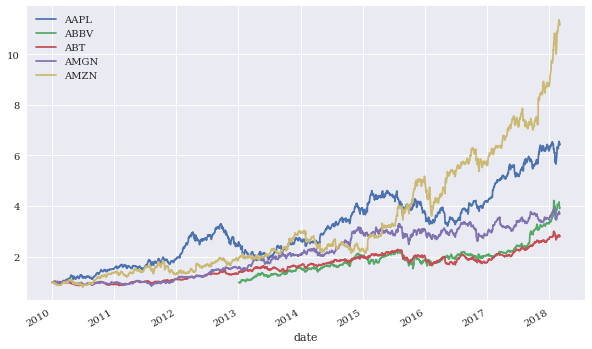

In [15]:
rets[rets.columns[:5]].cumsum().apply(np.exp).plot(figsize=(10, 6));

# Resampling

First we resample the data to weekly time intervals.

In [18]:
data.resample('1w', label='right').last().head()

,AAPL,ABBV,ABT,AMGN,AMZN,AVGO,BA,BAC,BMY,C,...,PFE,PG,PM,T,UNH,V,VZ,WFC,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2010-01-10,27.035592,NaN,21.358180,48.977198,133.52,16.947483,50.043823,15.656478,19.027407,34.678540,...,13.750689,46.590664,34.646230,17.639188,28.913244,20.427137,20.167013,23.647696,43.206399,54.287039
2010-01-17,26.263985,NaN,21.684643,48.528579,127.14,16.125304,49.410151,15.171295,19.219061,33.036381,...,14.346945,46.883590,34.899430,16.786518,29.841651,20.225213,19.423851,23.008569,43.489958,53.966877
2010-01-24,25.220720,NaN,21.301674,48.830534,121.43,15.524142,46.932332,13.902356,18.858752,31.394221,...,13.956802,46.828844,32.923061,16.526161,29.319975,19.424563,19.271407,22.336666,42.890432,51.616416
2010-01-31,24.495409,NaN,20.688142,50.452467,125.41,15.365010,49.231423,14.163608,18.674764,32.070405,...,13.735967,47.791666,32.008727,16.506635,29.178503,19.260207,18.687040,23.295357,43.287416,50.312341
2010-02-07,24.928657,NaN,21.090650,49.762283,117.39,15.205879,47.768363,13.995660,18.375784,31.104429,...,13.348489,47.597549,32.114227,16.428528,28.771773,19.384648,18.255117,22.507691,43.303619,50.273296
